# Time Series Analysis on Twitter

### Introduction:
https://www.reuters.com/markets/europe/twitter-shares-be-suspended-nyse-musk-nears-takeover-2022-10-27/

### Very recently, Elon Musk bought Twitter for 44 Billion. 
### According to reuters, "Twitter's shares were up about 1% at $53.94 in early trading on Thursday. The stock has surged nearly 65% from a four-month low hit in July."
### This project will use time series analysis to look at the stock price of Twitter over the last year, and see how the recent acquisition affected the stock price. 


In [1]:
#First use pip to install packages
!pip3 install yfinance
#!pip3 install PyPortfolioOpt

#set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


#### We look at the period of October 2021 to October 2022.

In [2]:
stock = 'TWTR'
start = datetime.datetime(2021,10,1)
end = datetime.datetime(2022,10,27)
twtr_close = yf.download(stock, start = start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
#descriptive stats

#show first 5 rows
twtr_close.head()

Date
2021-10-01    61.980000
2021-10-04    58.389999
2021-10-05    59.860001
2021-10-06    61.290001
2021-10-07    63.970001
Name: Close, dtype: float64

In [4]:
#show last 5 rows 
twtr_close.tail()

Date
2022-10-20    52.439999
2022-10-21    49.889999
2022-10-24    51.520000
2022-10-25    52.779999
2022-10-26    53.349998
Name: Close, dtype: float64

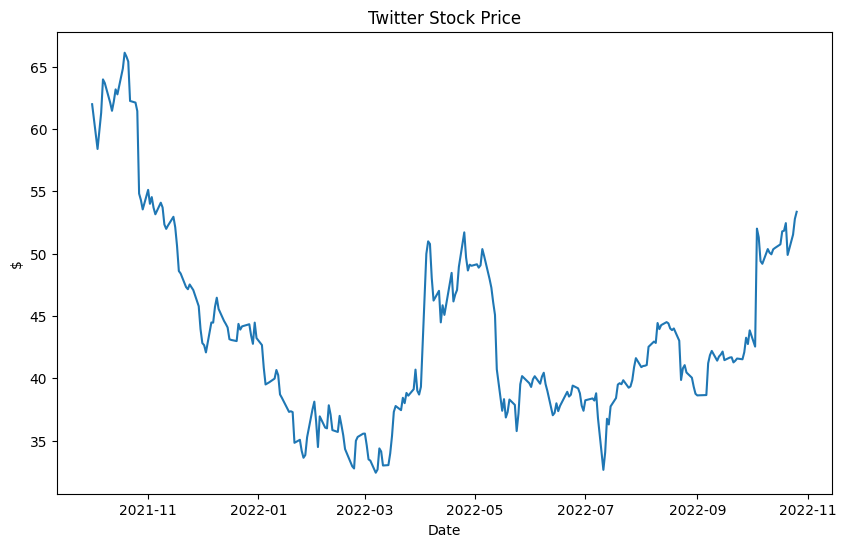

In [5]:
#line plot
plt.plot(twtr_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Twitter Stock Price')
plt.show()

#### Since October, Twitter's stock price has increased steadily. 

In [6]:
#need to learn about the time series components
!pip3 install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 45.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


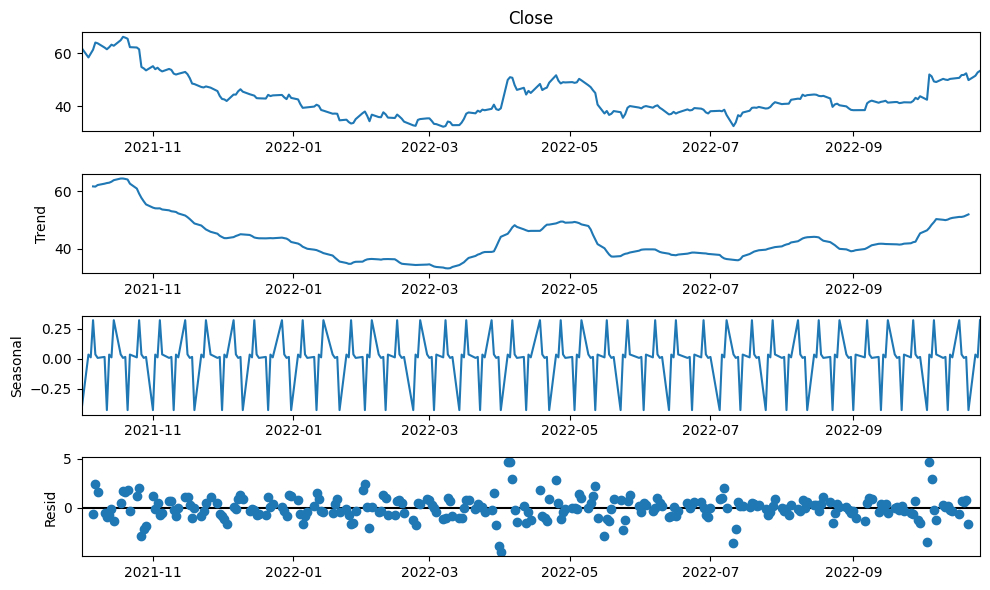

In [7]:
decomposition = seasonal_decompose(twtr_close, model='additive', period=7)
decomposition.plot()
plt.show()

#### First graph (behavior of raw data): Seems stable over the last year, in a U-Shape. Steadily increasing since October.
#### Second graph (trend/overall movement): U-Shaped.
#### Third graph (seasonality): consistent
#### Fourth graph (residuals): distribution slightly looks volatile (so not stationary) especially in April 2022.

In [8]:
#check for nulls
twtr_close.isnull().values.any()
#twtr_close.isnull().sum() #gives zero

False

#### No need for imputation.

In [9]:
#convert to df
df = pd.DataFrame(twtr_close)

#### Use isolation forest to detect anomalies.

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
twtr_scaled = scaler.fit_transform(twtr_close.values.reshape(-1,1))
twtr_scaled = pd.DataFrame(twtr_scaled)

In [12]:
np.arange(0.01, 0.05, 0.01)

array([0.01, 0.02, 0.03, 0.04])

In [13]:
contamination = np.arange(0.01, 0.05, 0.01)
outliers = []
for i in contamination:
    isolation_forest = IsolationForest(contamination=i)
    isolation_forest.fit(twtr_scaled)
    outliers.append(isolation_forest.predict(twtr_scaled))
    df['anomaly'] = isolation_forest.predict(twtr_scaled)

In [14]:
outliers

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, 

In [15]:
df['anomaly'].value_counts()

 1    259
-1     11
Name: anomaly, dtype: int64

In [16]:
df[df['anomaly']==-1]

,Close,anomaly
Date,,
2021-10-04,58.389999,-1
2021-10-05,59.860001,-1
2021-10-07,63.970001,-1
2021-10-08,63.680000,-1
2021-10-14,63.169998,-1
2021-10-15,62.770000,-1
2021-10-18,64.839996,-1
2021-10-19,66.110001,-1
2021-10-20,65.800003,-1


#### Data is consistent in that it has a low number of anomalies (11).

In [17]:
df['Close'].describe()

count    270.000000
mean      43.574778
std        7.520700
min       32.419998
25%       38.335000
50%       41.595001
75%       48.307501
max       66.110001
Name: Close, dtype: float64

In [18]:
#stationary time series means no trends or seasonality (time observed has no impact on data)

#to make data stationary, take the first differences

twtr_diff = twtr_close.diff().dropna() #dropna is not necessary since there are no nulls
twtr_diff

Date
2021-10-04   -3.590000
2021-10-05    1.470001
2021-10-06    1.430000
2021-10-07    2.680000
2021-10-08   -0.290001
                ...   
2022-10-20    0.609997
2022-10-21   -2.549999
2022-10-24    1.630001
2022-10-25    1.259998
2022-10-26    0.570000
Name: Close, Length: 269, dtype: float64

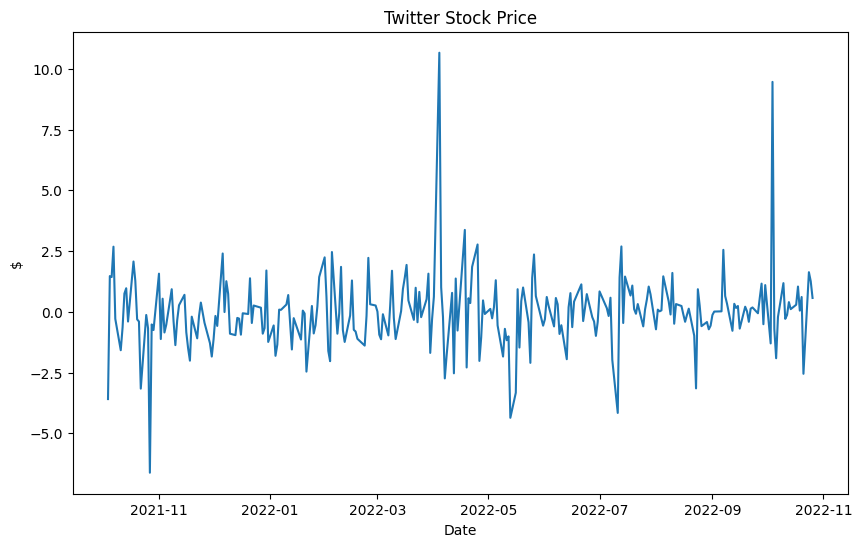

In [19]:
plt.plot(twtr_diff)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Twitter Stock Price')
plt.show()

#### Consistent, with a few spikes. The most recent spike was October 2022, which can be explained by the hype around Elon Musk's intention to buy Twitter.

In [20]:
#ADF
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(twtr_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -2.3314161954070345 and p-value is 0.16203568865755524


#### P value is higher than .05, suggesting data is non-stationary.

In [21]:
stat_test = adfuller(twtr_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -15.525871380753113 and p-value is 2.2526790786594326e-28


#### Looking at the P value now, data is stationary.

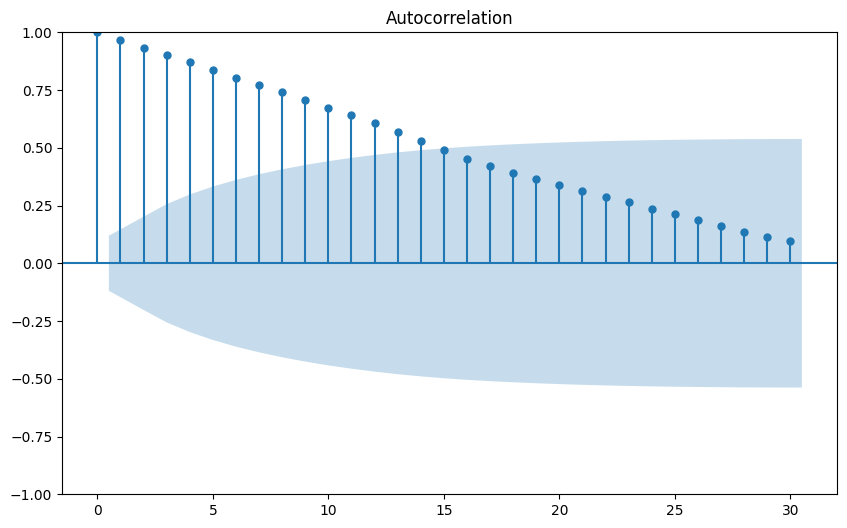

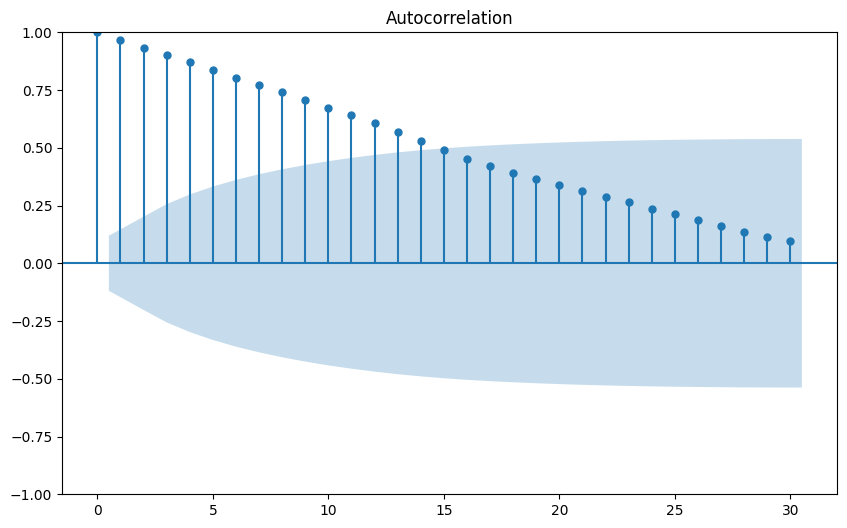

In [22]:
#ACF serial dependence 
#when time-series is highly corrleated with its lagged version, shown by acf plot
#longer the bar, the more dependence a series has

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(twtr_close, lags=30)

#### acf is steadily decaying, which is an indicator of non-stationarity. 

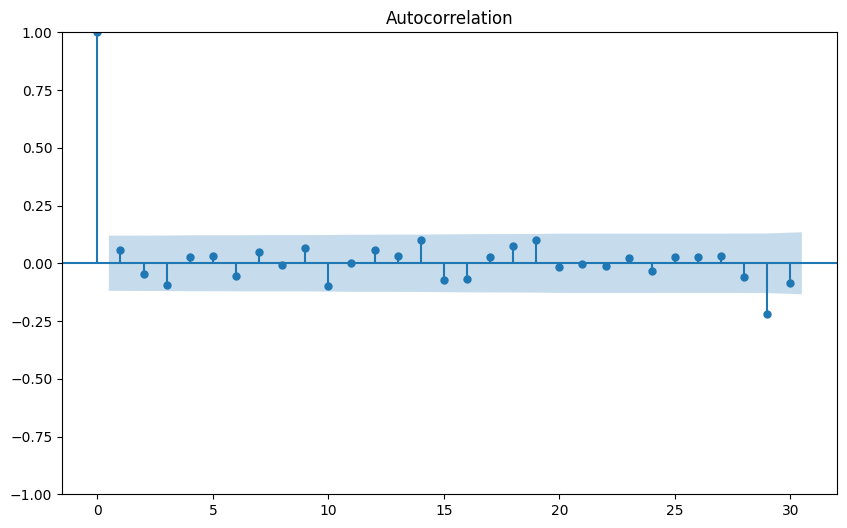

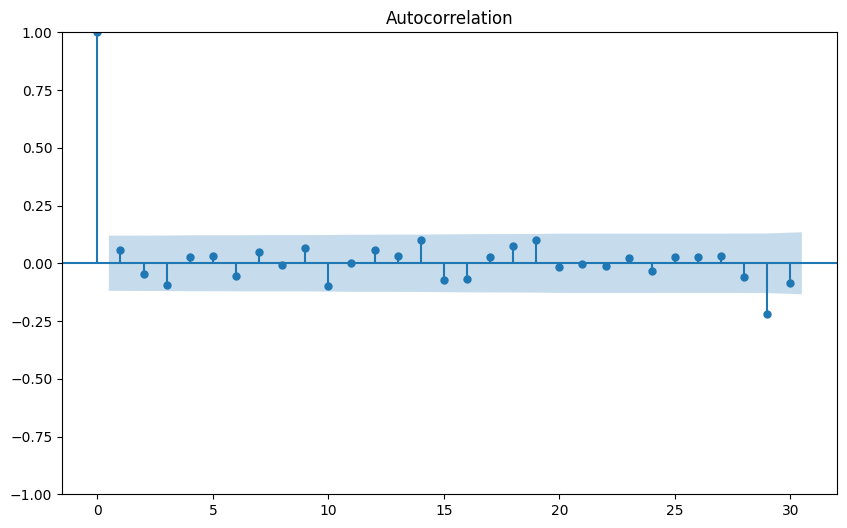

In [23]:
sm.graphics.tsa.plot_acf(twtr_diff, lags=30)

#### At 29th lag, there is a spike. 

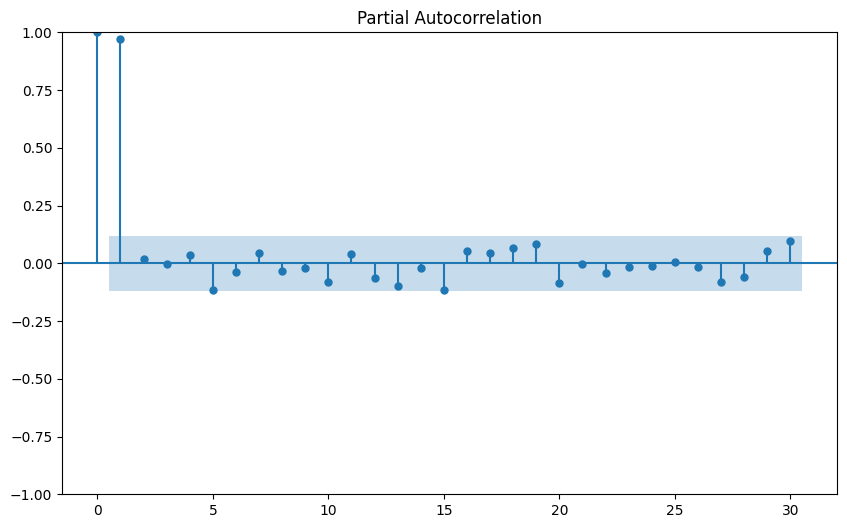

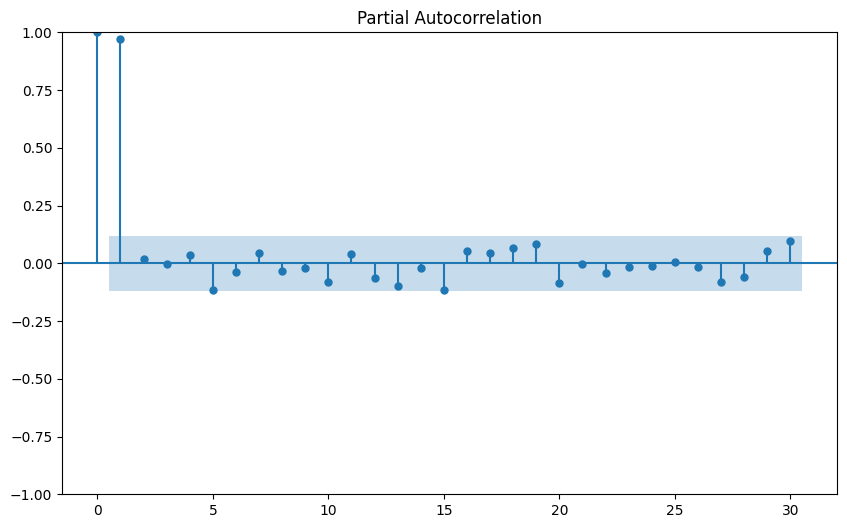

In [24]:
#PACF
sm.graphics.tsa.plot_pacf(twtr_close, lags=30)

#### Here there are spikes at the 5th and 15th lags.

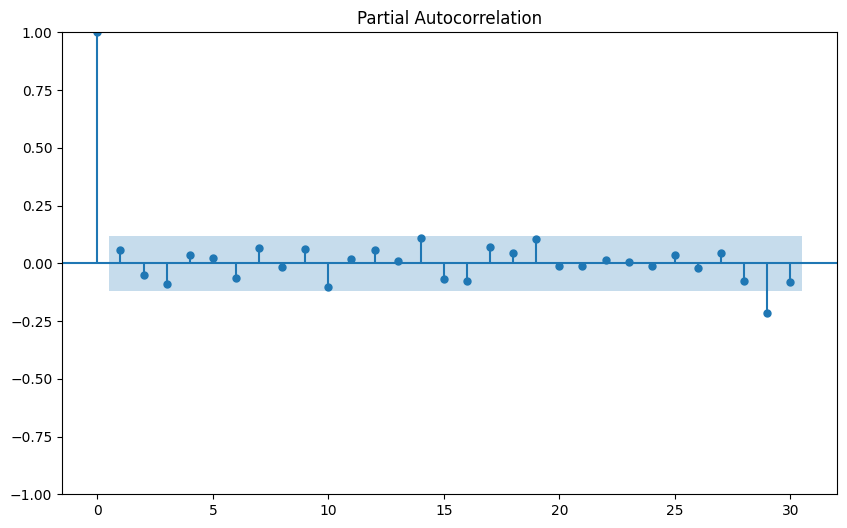

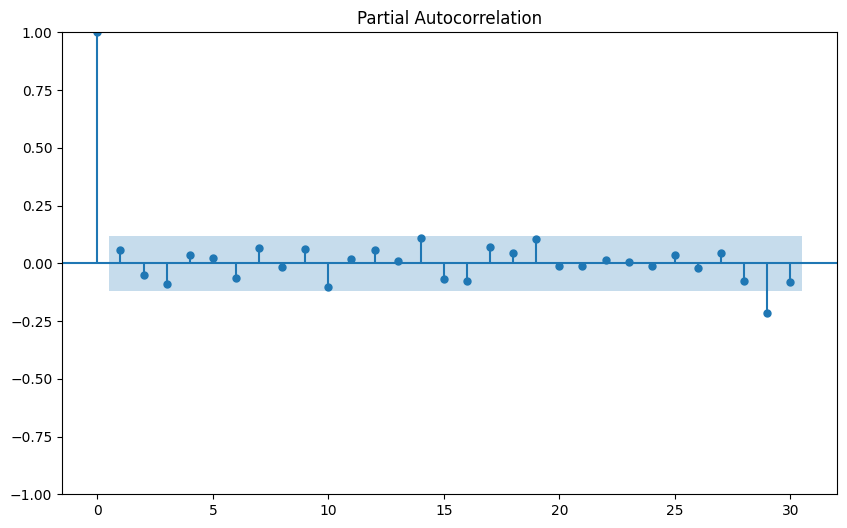

In [25]:
sm.graphics.tsa.plot_pacf(twtr_diff, lags=30)

#### Here there is a spike at the 29th lag.

#### Time series was non-stationary (twtr_close) but after taking the first difference (.diff()), time series became stationary (twtr_diff).

#### Predictive Modeling
#### We will use the moving average and autoregressive model with the optimal lag. 
#### Then, we will visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.

In [26]:
#Moving average 
from statsmodels.tsa.arima.model import ARIMA

In [27]:
train_len = int(len(twtr_diff) * 0.8)
diff_train = twtr_diff[:train_len]
diff_test = twtr_diff[train_len:]

In [28]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [29]:
#using twtr_diff (instead of twtr_close), significant lag is the 29th lag.
ma_model = ARIMA(diff_train, order=(0, 0, 29))
ma_result = ma_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


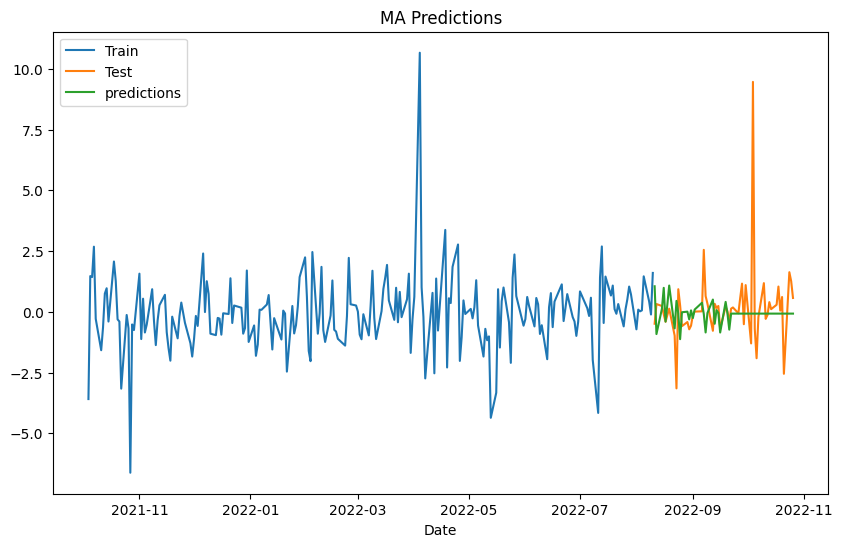

In [31]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
plt.title('MA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [33]:
ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,0.925779,2.779523,1.66719


In [34]:
ma_model = ARIMA(twtr_diff, order=(0, 0, 29))
ma_result = ma_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
forecast_index = pd.date_range(diff_test.index[-1], periods=10)

In [36]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


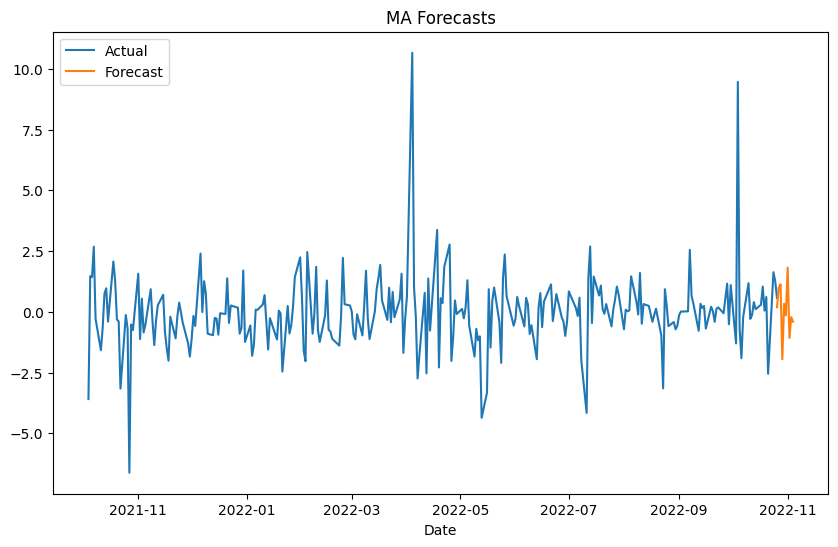

In [37]:
plt.plot(twtr_diff.index, twtr_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Date')
plt.show()

#### The forecasting looks pretty good.

In [38]:
#Autoregressive model
#regress the current value of a series over its lagged values

ar_model = ARIMA(diff_train, order=(29, 0, 0))
ar_result = ar_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


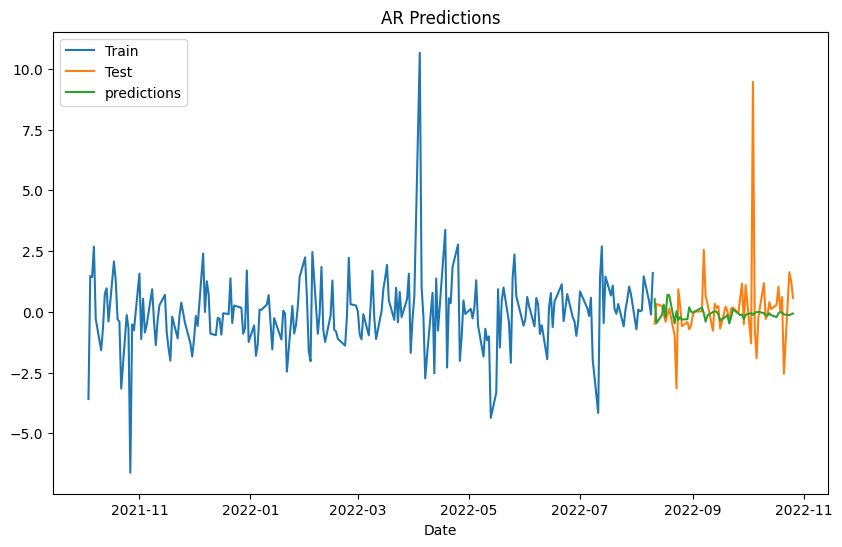

In [40]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index , ar_pred, label='predictions')
plt.title('AR Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [41]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [42]:
ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,0.860389,2.630807,1.621976


In [43]:
ar_model = ARIMA(twtr_diff, order=(29, 0, 0))
ar_result = ar_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


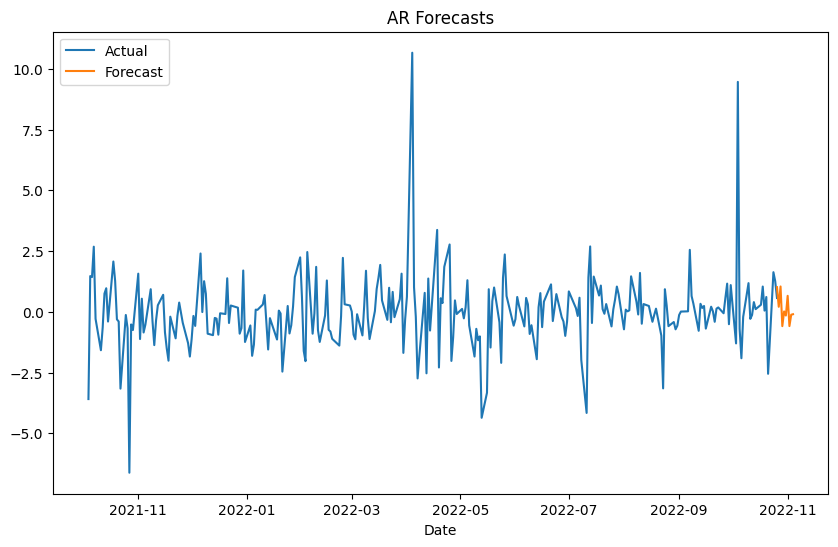

In [45]:
plt.plot(twtr_diff.index, twtr_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
plt.legend()
plt.title('AR Forecasts')
plt.xlabel('Date')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5392f4dc-d78f-400f-82e9-d04377fabd91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>